# Project Fletcher - NLP Data Exploration

In [1]:
#General imports
import pandas as pd 
import numpy as np
import re, pickle, time
import matplotlib.pyplot as plt

% matplotlib inline

plt.style.use('seaborn-white')

In [ ]:
## Crazy idea: build web-app that will analyze any text thrown into it!

## TO DO: Add vader sentiment
# def print_random_transcript(name, start=0, end=-1):
#     '''
#     Function to debug data exploration with transcript data.
#     ----------
#     Args:
    
#     name = name of dataframe (transcript series must be of format name['Content'],
#     where name is a pandas dataframe and series values are strings) ***
    
#     start = where to start slicing the string. Default is 0 
    
#     end = where to stop slicing the string. Default is -1
#     '''
#     import numpy as np
    
    
#     rand_num = np.random.randint
#     slice_ = rand_num(0,(len(name))+1)
#     print(name.Date[slice_],
#           f"\nLENGTH OF TRANSCRIPT: {len(name.Content[slice_][start : end])}\n",
#           "-"*75, '\n',
#           name.Content[slice_][start : end])

## Data Cleaning

### Sean Hannity

In [3]:
hannity = pickle.load(open('pickles/raw_data/df_Hannity.pickle','rb'))

In [4]:
hannity.Date = pd.to_datetime(hannity.Date)
hannity = hannity.sort_values('Date', ascending = False)
hannity["Content"] = hannity["Content"].str.replace(r'^(ADVERTISEMENT\n)','')
hannity['Network'] = 'Fox News'

hannity.head()

,Title,Date,Content,URL,Show,Network
0,DOJ to probe potential Obama-era surveillance ...,2018-02-19,"SEAN HANNITY, FOX NEWS HOST: Hey, Tucker. Grea...",http://www.foxnews.com/transcript/2018/02/19/d...,Hannity,Fox News
1,Hannity: Examining key points from Russian ind...,2018-02-16,"SEAN HANNITY, HOST: This is a Fox News alert. ...",http://www.foxnews.com/transcript/2018/02/16/h...,Hannity,Fox News
2,Judge Jeanine: Our kids deserve our protection,2018-02-15,SEAN HANNITY: And welcome to HANNITY. And this...,http://www.foxnews.com/transcript/2018/02/15/j...,Hannity,Fox News
3,Students describe Florida high school shooting...,2018-02-14,"SEAN HANNITY, FOX NEWS HOST: Welcome to HANNIT...",http://www.foxnews.com/transcript/2018/02/14/s...,Hannity,Fox News
4,Newt Gingrich on Obama officials under fire,2018-02-13,Welcome to HANNITY.\nWe have a ton of new brea...,http://www.foxnews.com/transcript/2018/02/13/n...,Hannity,Fox News


In [5]:
sean = hannity[['Date','Show','Content','Network']]
sean.head()

,Date,Show,Content,Network
0,2018-02-19,Hannity,"SEAN HANNITY, FOX NEWS HOST: Hey, Tucker. Grea...",Fox News
1,2018-02-16,Hannity,"SEAN HANNITY, HOST: This is a Fox News alert. ...",Fox News
2,2018-02-15,Hannity,SEAN HANNITY: And welcome to HANNITY. And this...,Fox News
3,2018-02-14,Hannity,"SEAN HANNITY, FOX NEWS HOST: Welcome to HANNIT...",Fox News
4,2018-02-13,Hannity,Welcome to HANNITY.\nWe have a ton of new brea...,Fox News


### Rachel Maddow

In [6]:
# load data
maddow = pickle.load(open('pickles/raw_data/df_RachelMaddow.pickle','rb'))

In [7]:
# do some reordering
maddow = maddow[['Date', 'Title', 'Content', 'URLs', 'Show']]
maddow.rename(columns = {'URLs':'URL'},inplace=True)
maddow.Date = pd.to_datetime(maddow.Date)
maddow.Content = maddow.Content.str.replace(r'^.*\n.*\n.*\n\n?','')
maddow = maddow.sort_values('Date', ascending = False)
maddow['Network'] = 'MSNBC'

rachel = maddow[['Date','Show','Content','Network']]

### Anderson Cooper

In [8]:
cooper = pickle.load(open('pickles/raw_data/df_ac360.pickle','rb'))

In [9]:
cooper.rename(columns = {'URLs':'URL'},inplace=True)
cooper.Date = pd.to_datetime(cooper.Date, yearfirst=True)
cooper.Content = cooper.Content.str.replace(r'^\(?COMMERCIAL BREAK\)','')
cooper = cooper.sort_values('Date', ascending = False)

cooper['Network'] = 'CNN'

In [10]:
cooper.head()

,Title,Date,URL,Content,ShowNum,Show,Network
0,"Pres. Trump Tweets: ""We Must Now Focus On Stre...",2018-02-20,http://transcripts.cnn.com//TRANSCRIPTS/1802/2...,"\n\n[21:00:27] ANDERSON COOPER, CNN HOST: Welc...",02,Anderson Cooper 360,CNN
1,President Trump Blames President Obama for Rus...,2018-02-20,http://transcripts.cnn.com//TRANSCRIPTS/1802/2...,"[20:00:07] ANDERSON COOPER, CNN HOST: Good eve...",01,Anderson Cooper 360,CNN
2,President Trump Uses Florida Massacre to Attac...,2018-02-19,http://transcripts.cnn.com//TRANSCRIPTS/1802/1...,"[20:00:08] ANDERSON COOPER, CNN HOST: Good eve...",01,Anderson Cooper 360,CNN
3,Pres. Trump Slams FBI's Handling of Tip on Sch...,2018-02-19,http://transcripts.cnn.com//TRANSCRIPTS/1802/1...,"\n\n[21:00:16] ANDERSON COOPER, CNN HOST: Welc...",02,Anderson Cooper 360,CNN
4,Mueller Charges 13 Russians with Interfering i...,2018-02-16,http://transcripts.cnn.com//TRANSCRIPTS/1802/1...,"[20:00:09] ANDERSON COOPER, CNN HOST: Good eve...",01,Anderson Cooper 360,CNN


In [26]:
#print_random_transcript(cooper)

In [65]:
anderson = cooper[['Date','Show','Content','Network']]
anderson.head()

,Date,Show,Content,Network
0,2018-02-20,Anderson Cooper 360,"\n\n[21:00:27] ANDERSON COOPER, CNN HOST: Welc...",CNN
1,2018-02-20,Anderson Cooper 360,"[20:00:07] ANDERSON COOPER, CNN HOST: Good eve...",CNN
2,2018-02-19,Anderson Cooper 360,"[20:00:08] ANDERSON COOPER, CNN HOST: Good eve...",CNN
3,2018-02-19,Anderson Cooper 360,"\n\n[21:00:16] ANDERSON COOPER, CNN HOST: Welc...",CNN
4,2018-02-16,Anderson Cooper 360,"[20:00:09] ANDERSON COOPER, CNN HOST: Good eve...",CNN


### Tucker Carlson

In [25]:
carlson = pickle.load(open('pickles/raw_data/df_tucker_carlson.pickle','rb'))

In [38]:
carlson.rename(columns = {'URLs':'URL'},inplace=True)
carlson.Date = pd.to_datetime(carlson.Date)
carlson = carlson.sort_values('Date', ascending = False)

carlson["Network"] = 'Fox'

In [41]:
tucker = carlson[['Date','Show','Content','Network']]

In [48]:
tucker.head() # unfortunately, we won't be able to analyze by speaker for tucker :(

,Date,Show,Content,Network
0,2018-02-20,Tucker Carlson Tonight,5:00 pm\n excellent student who love the bea...,Fox
1,2018-02-19,Tucker Carlson Tonight,9:00 pm\n display but not subjected on the d...,Fox
2,2018-02-16,Tucker Carlson Tonight,"5:00 pm\nin their prayers. good night, everybo...",Fox
3,2018-02-15,Tucker Carlson Tonight,"5:00 pm\nsinister thoughts, we love to hear th...",Fox
4,2018-02-14,Tucker Carlson Tonight,"9:00 pm\nthe school, his potential motives and...",Fox


### Random Transcript Printing

In [4]:
def print_random_transcript(name, start=0, end=-1):
    '''
    Function to debug data exploration with transcript data. Returns date, length, and transcript content.
    ----------
    Args:
    
    name = name of dataframe (transcript series must be of format name['Content'],
    where name is a pandas dataframe and series values are strings) ***
    
    start = where to start slicing the string. Default is 0 
    
    end = where to stop slicing the string. Default is -1
    '''
    import numpy as np
    
    
    rand_num = np.random.randint
    slice_ = rand_num(0,(len(name))+1)
    print(name.Date[slice_], f'at index: {str(slice_)}'
          f"\nLENGTH OF TRANSCRIPT: {len(name.Content[slice_][start : end])}\n",
          "-"*75, '\n',
          name.Content[slice_][start : end])

In [3]:
# print_random_transcript(hannity)

NameError: name 'hannity' is not defined

In [51]:
# print_random_transcript(cooper)

In [50]:
# print_random_transcript(maddow)

In [49]:
# print_random_transcript(carlson)

### Data Dumps

In [66]:
pickle.dump(sean, 
            open('pickles/sean.p',
                 'wb'))

pickle.dump(rachel, 
            open('pickles/rachel.p',
                 'wb'))

pickle.dump(anderson, 
            open('pickles/anderson.p',
                 'wb'))

pickle.dump(tucker, 
            open('pickles/tucker.p',
                 'wb'))

## Exploratory Data Analysis

### The Giler List
#### Exploring the following methods:
- [Basic Text Analysis](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week06-mcnulty3/05-nlp/NLP_nltk.ipynb) (Sentence and word tokenization, part of speech tagging, chunking)

In [67]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.tag      import pos_tag
from textblob      import TextBlob
from collections   import defaultdict

import re

In [68]:
sean = pickle.load(open('pickles/sean.p','rb'))
rachel = pickle.load(open('pickles/rachel.p','rb'))
anderson = pickle.load(open('pickles/anderson.p','rb'))
tucker = pickle.load(open('pickles/tucker.p','rb'))

#### Single String Corpora generated from transcripts

In [71]:
anderson = anderson.dropna(subset = ['Content'])
anderson.shape

(923, 4)

In [72]:
#  converting pandas series to single string

sean_corpus = ''
for transcript in sean.Content:
    sean_corpus += transcript

rachel_corpus = ''
for transcript in rachel.Content:
    rachel_corpus += transcript
    
anderson_corpus = ''
for transcript in anderson.Content:
    anderson_corpus += transcript
    
tucker_corpus = ''
for transcript in tucker.Content:
    tucker_corpus += transcript
    


#### Data Dumps Pt2 - Single-string corpora

In [73]:
pickle.dump(sean_corpus, 
            open('pickles/corpus_sean.p',
                 'wb'))

pickle.dump(rachel_corpus, 
            open('pickles/corpus_rachel.p',
                 'wb'))

pickle.dump(anderson_corpus, 
            open('pickles/corpus_anderson.p',
                 'wb'))

pickle.dump(tucker_corpus, 
            open('pickles/corpus_tucker.p',
                 'wb'))

##### Other Random Transcript Generator Functions

In [12]:
# def print_random_sean(start=0, end=-1):
#     rand_num = np.random.randint
#     slice_ = rand_num(0,(len(sean))+1)
#     print(sean.Date[slice_],
#           '\n', 
#           sean.Content[slice_][start : end])
    
# def print_random_rachel(start=0, end=-1):
#     rand_num = np.random.randint
#     slice_ = rand_num(0,(len(rachel))+1)
#     print(rachel.Date[slice_],
#           '\n', 
#           rachel.Content[slice_][start : end])

# # print_random_sean()
# # print_random_rachel()

In [79]:
# def return_random_sean():
#     rand_num = np.random.randint
#     slice_ = rand_num(0,(len(sean))+1)
#     return sean.Content[slice_]
    
# def return_random_sean():
#     rand_num = np.random.randint
#     slice_ = rand_num(0,(len(sean))+1)
#     return sean.Content[slice_]

In [22]:
### TO DO -> get frequency distribution of POS for both corpora?
### how to work with lots and lots and lots of text data?

In [26]:
# master_sean_blob = TextBlob(sean_corpus) 
### is this not what I want? maybe 
### I need to do one document at a time?

#### Corpus Tagger

In [35]:
# function that returns a default dictionary of part-of-speech counts for the passed-in string.

def corpus_tagger(string):
    from textblob import TextBlob
    from textblob.taggers import NLTKTagger
    nltk_tagger = NLTKTagger()
    blob = TextBlob(string, pos_tagger=nltk_tagger)
    
    corpus_tags = defaultdict(int)
    for sentence in blob.sentences:
        for tag in sentence.tags:
            corpus_tags[tag[1]] += 1
    
    return corpus_tags

sean_tags = corpus_tagger(sean_corpus)

rachel_tags = corpus_tagger(rachel_corpus)

In [37]:
pickle.dump(sean_tags, open('pickles/sean_pos_tags.p','wb'))
pickle.dump(rachel_tags, open('pickles/rachel_pos_tags.p','wb'))

#### n-grams?

In [134]:
from nltk.util import ngrams
from nltk.corpus import stopwords

from collections import Counter
from operator import itemgetter

stop = set(stopwords.words('english') + ['.', ',', '(', ')', "'", '"'])

- Dimension Reduction (PCA)
    - [PCA Lecture](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/02-dim_reduct_pca/Dimensionality_Reduction_PCA.pdf)
    - [PCA / SVD Code](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/02-dim_reduct_pca/pca_SVD.ipynb)
    - [LDA / LSA / NMF](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/02-dim_reduct_pca/LSA_NMF.ipynb)
    - [Recommender Systems](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/02-dim_reduct_pca/Recommender_Systems.ipynb)
- Topic Modeling (UMF, LDA)
    - [Lecture](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/03-lda_topics_models/Topic_Modeling.pdf)
    - [LDA Code](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/03-lda_topics_models/LDA.ipynb)
- [Word2Vec (Gensim)](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/04-word2vec/WORD2VEC_GENSIM.ipynb)
- Clustering (K-Means)
    - [Lecture](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/01-unsup_kmeans/Unsupervised_Learning_Kmeans.pdf)
    - [Code](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/01-unsup_kmeans/digits_clustering.ipynb)
- Text Summarization
    - [Sumy (Extractive Text Summarization)](https://pypi.python.org/pypi/sumy)
    - [Keras *Maybe* (Abstractive Text Summarization)](https://hackernoon.com/how-to-run-text-summarization-with-tensorflow-d4472587602d)
- Visualization
    - Overall article topic distribution by blog
    - ...

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#### Let's look at random transcripts!

In [38]:
### I'd like to get the guests as a feature to add in. ??? could use this for practice with mongoDB

#### BLOB

In [18]:
from textblob import TextBlob

In [19]:
print( 'sentiment for sean' , TextBlob(sean_corpus).sentiment )
print( 'sentiment for rachel' , TextBlob(rachel_corpus).sentiment )

sentiment for sean Sentiment(polarity=0.08718841759429466, subjectivity=0.45373881187463877)
sentiment for rachel Sentiment(polarity=0.0992786241349691, subjectivity=0.42796236550439926)


In [20]:
{'polarity' : 0.08718841759429466, 'subjectivity' : 0.45373881187463877}
{'polarity' : 0.0992786241349691,  'subjectivity' : 0.42796236550439926}

{'polarity': 0.0992786241349691, 'subjectivity': 0.42796236550439926}

In [549]:
TextBlob('hello').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [550]:
def sentiment_(text):
    return TextBlob(str(text)).sentiment

def polarity_(text):
    return TextBlob(str(text)).sentiment[0]

def subjectivity_(text):
    return TextBlob(str(text)).sentiment[1]

In [39]:
    
sean['polarity'] = sean['Content'].apply(polarity)
sean['subjectivity'] = sean['Content'].apply(subjectivity)

rachel['polarity'] = rachel['Content'].apply(polarity) 
rachel['subjectivity'] = rachel['Content'].apply(subjectivity) 

In [38]:
sentiment('hello')

Sentiment(polarity=0.0, subjectivity=0.0)

KeyError: 'polarity'

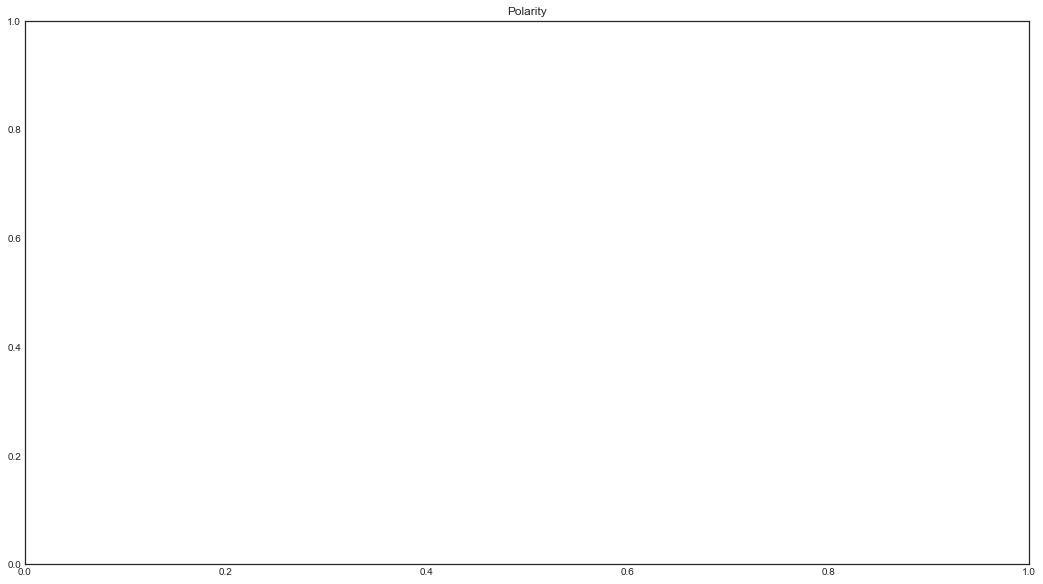

In [89]:
# plot polarity, sean and rachel

fig, ax = plt.subplots(figsize = (18,10))
ax.set_title('Polarity')

ax.plot(sean['Date'], sean['polarity']) 
ax.plot(rachel['Date'], rachel['polarity'])
plt.ylim(-.7,.7)
plt.axhline(linewidth=2.5, color='w', alpha = .49)

ax.legend(['Sean','Rachel'])

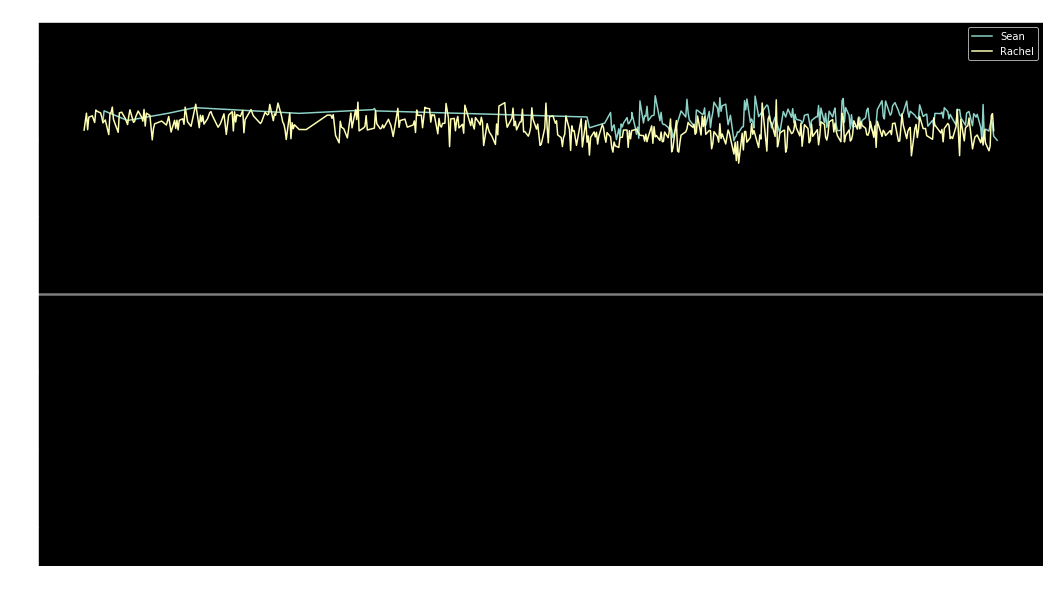

In [23]:
# plot subjectivity, sean and rachel
fig, ax = plt.subplots (figsize = (18,10))
ax.set_title ('Subjectivity')

ax.plot (sean['Date'], sean['subjectivity']) 
ax.plot (rachel['Date'], rachel['subjectivity'])
plt.ylim (-.7 , .7)
plt.axhline (linewidth=2.5, color='w', alpha = .49)


ax.legend(['Sean','Rachel'])

#### Some random things

In [511]:
sean_corpus.lower().count('donald trump')

1711

In [512]:
rachel_corpus.lower().count('donald trump')

6195

In [513]:
sean_corpus.lower().count('president trump')

2028

In [515]:
rachel_corpus.lower().count('president trump')

853

In [ ]:
TextBlob(sean_corpus)

#### Frequency counts?

In [29]:
import nltk

In [30]:
fd = nltk.FreqDist()